# Importing Libraries

In [332]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

# Importing Data

In [333]:
data = pd.read_csv(r'train.csv')

# Getting some info about the data

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


# Statistical measures about the data

In [335]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


# First 5 rows in the dataset

In [336]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# Last 5 rows in the dataset

In [337]:
data.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


# Getting types for each feature

In [338]:
data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

# Number of rows and columns in the dataset

In [339]:
data.shape

(913000, 4)

# Checking for missing values

In [340]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

# Number of duplicated rows

In [341]:
data.duplicated().sum()

0

No duplicated row

# Histogram for some feature

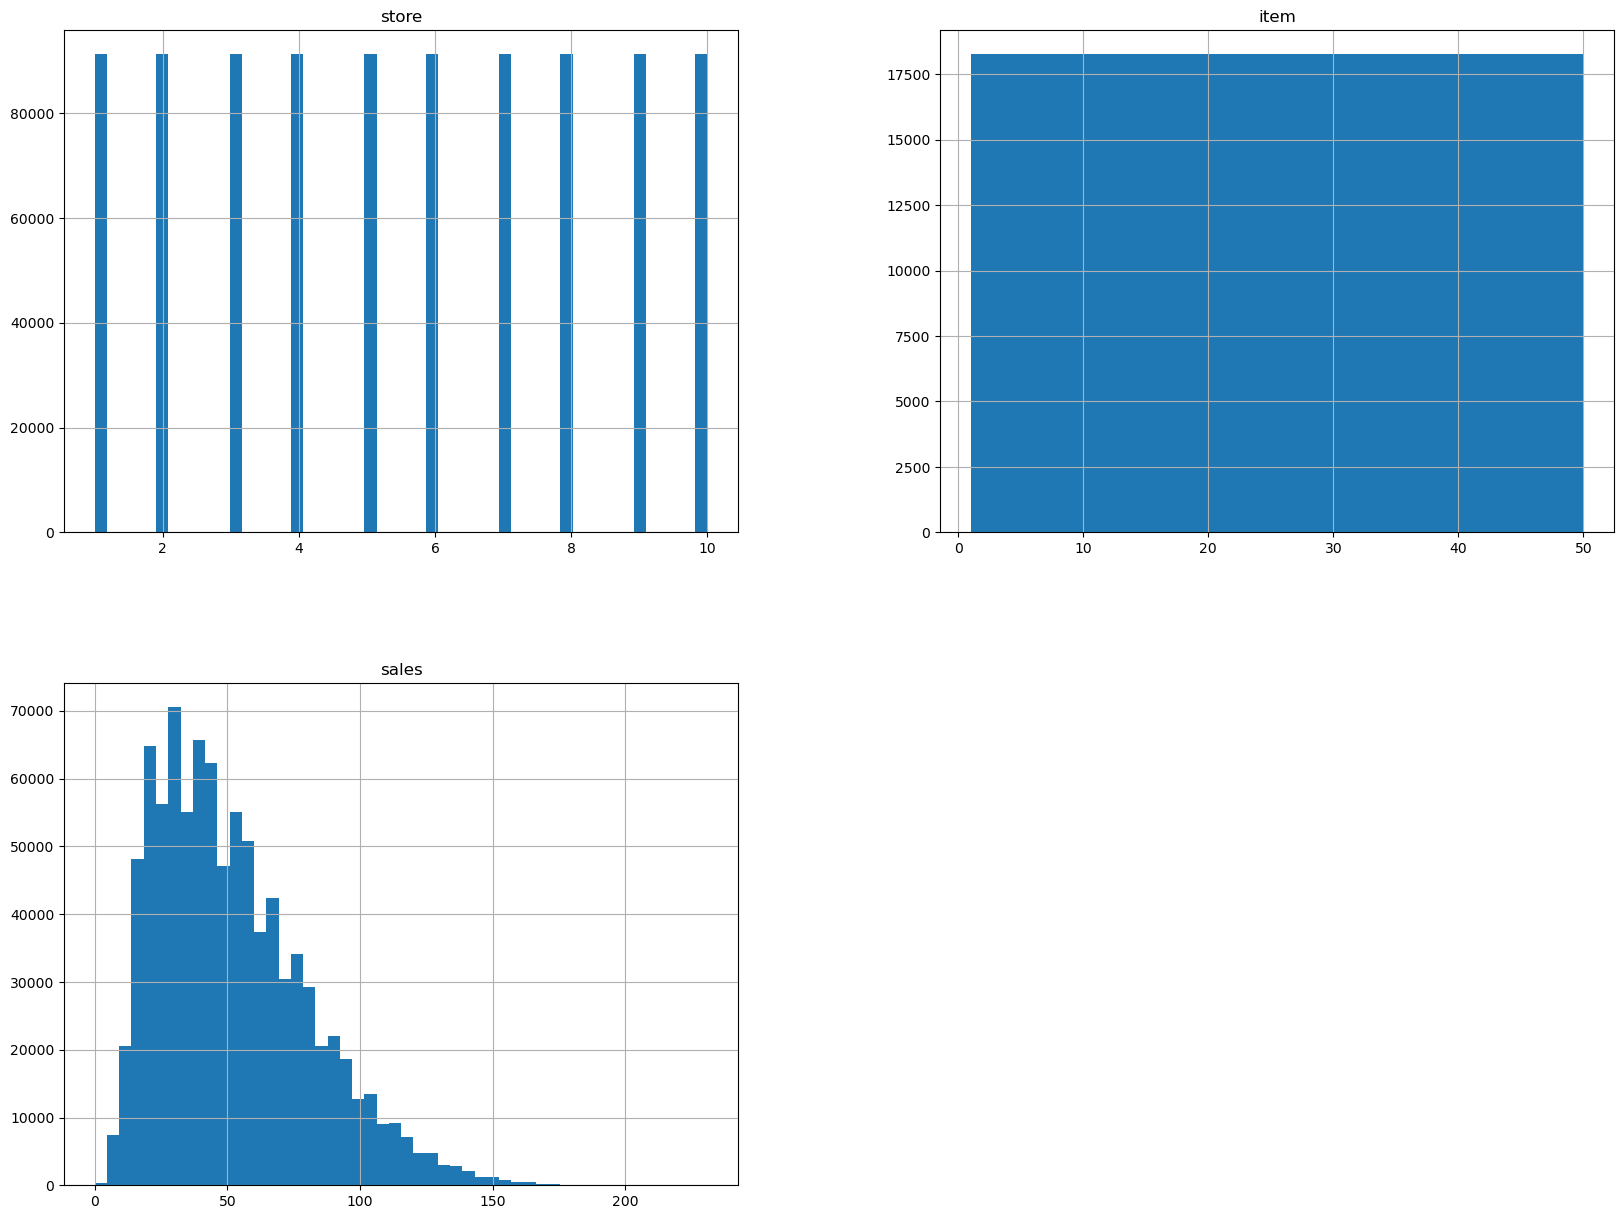

In [342]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Dropping store and item columns

In [343]:
data = data.drop(['store','item'],axis=1)

# Getting some info about the data after drop

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


# Convert data from object datatype to dateTime dataType

In [345]:
data['date'] = pd.to_datetime(data['date'])

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


# Converting date to a Month peroid, and then sum the number of items in each month

In [347]:
data['date'] = data['date'].dt.to_period("M")
monthly_sales = data.groupby('date').sum().reset_index()

# Convert the resulting date column to timestamp datatype

In [348]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

# Display the first 5 rows of monthly_sales

In [349]:
monthly_sales.head(5)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


# Visualization

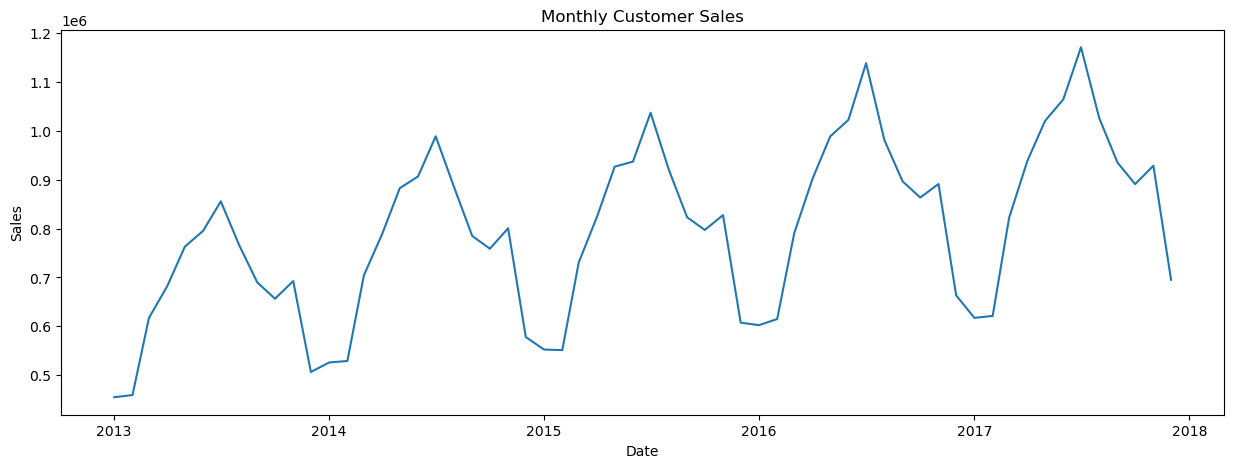

In [350]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()

# Call the difference on the sales columns to make the sales data stationery

In [351]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head()

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


 617382 - 459,417 =  157,965

# Preparing the supervised data

In [352]:
supervised_data = monthly_sales.drop(['date','sales'],axis=1)

In [353]:
for i in range(1,13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)

In [354]:
supervised_data.head()

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0


# Split Dataset into Train and Test

In [355]:
train_data = supervised_data[:-12] # Includes all data except the last 12 months.
test_data = supervised_data[-12:] # Includes data for the last 12 months only.

In [356]:
print("Train Data shape: ", train_data.shape)
print("Test Data shape: ",test_data.shape)

Train Data shape:  (35, 13)
Test Data shape:  (12, 13)


# Scaling the data

In [357]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Splitting data into input and output

In [358]:
x_train, y_train = train_data[:, 1:], train_data[:, 0]
x_test, y_test = test_data[:, 1:], test_data[:, 0]

In [359]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [360]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (35, 12)
y_train shape:  (35,)
x_test shape:  (12, 12)
y_test shape:  (12,)


the first col is the output and the secound col is the input 

# Make a prediction data frame to merge the predicted sales prices of all trained Aglo

In [361]:
sales_dates = data.index[-13:].to_series().reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

# Actual sales for the last 13 months

In [362]:
actual_sales = monthly_sales['sales'][-13:].to_list()
print(actual_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


# Making a prediction using Linear Regression  

In [363]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predict = lr_model.predict(x_test)
lr_predict = lr_predict.reshape(-1, 1)

# this is a set matrix - contains the input features of the test data , and the predicted output 

In [364]:
lr_pre_test_set = np.concatenate([lr_predict,x_test],axis=1) 
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

# Adjusting the predictions to get the final predicted sales

In [365]:
result_list = []
for index in range(0, len(lr_pre_test_set)):
    result_list.append((lr_pre_test_set[index][0] + actual_sales[index]))
lr_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index=True, right_index=True)

# Calculating metrics

In [366]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'] , monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'] , monthly_sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression MSE: 16221.272385416854
Linear Regression MAE: 12433.184266490736
Linear Regression R2 Score: 0.9906152516380969


# visualization of the prediction against the actual sales 

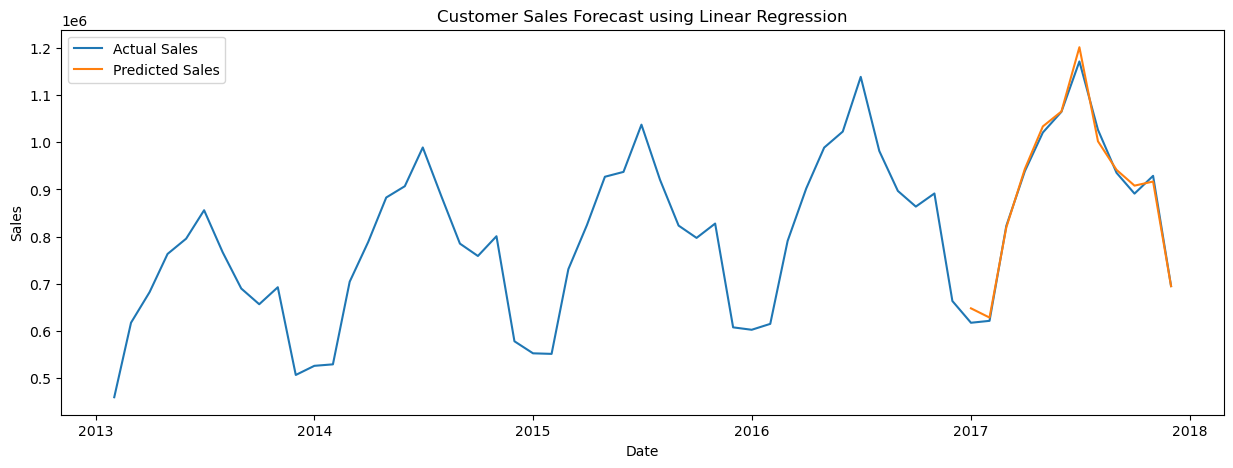

In [369]:
date_list = ['2017-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', 
             '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', 
             '2017-11-01', '2017-12-01']

# Ensure date_list and result_list have the same length
if len(date_list) != len(result_list):
    raise ValueError("The length of date_list and result_list must be the same.")

# Create DataFrame for predictions
predict_df = pd.DataFrame({
    'date': pd.to_datetime(date_list),
    'Linear Prediction': result_list
})

# Assuming monthly_sales DataFrame is already defined and has 'date' and 'sales' columns
# Ensure 'date' column in monthly_sales is of datetime type
monthly_sales['date'] = pd.to_datetime(monthly_sales['date'])

# Plot the actual and predicted sales
plt.figure(figsize=(15, 5))
# Actual Sales
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales')
# Predicted Sales
plt.plot(predict_df['date'], predict_df['Linear Prediction'], label='Predicted Sales')
plt.title('Customer Sales Forecast using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
